In [539]:
"""
BUAN 6341: Applied Machine Learning
Homework 1_Linear Regression

Siddhartha Shankar
"""
import os
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
import random

In [329]:
#os.getcwd()
energy_data = pd.read_csv("energydata_complete.csv")
energy_data

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,17.033333,45.530000,6.600000,733.500000,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,17.066667,45.560000,6.483333,733.600000,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,17.000000,45.500000,6.366667,733.700000,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,17.000000,45.400000,6.250000,733.800000,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,17.000000,45.400000,6.133333,733.900000,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
5,2016-01-11 17:50:00,50,40,19.890000,46.026667,19.200000,44.500000,19.790000,44.933333,18.890000,...,17.000000,45.290000,6.016667,734.000000,92.000000,5.333333,43.833333,4.800000,44.919484,44.919484
6,2016-01-11 18:00:00,60,50,19.890000,45.766667,19.200000,44.500000,19.790000,44.900000,18.890000,...,17.000000,45.290000,5.900000,734.100000,92.000000,5.000000,40.000000,4.700000,47.233763,47.233763
7,2016-01-11 18:10:00,60,50,19.856667,45.560000,19.200000,44.500000,19.730000,44.900000,18.890000,...,17.000000,45.290000,5.916667,734.166667,91.833333,5.166667,40.000000,4.683333,33.039890,33.039890
8,2016-01-11 18:20:00,60,40,19.790000,45.597500,19.200000,44.433333,19.730000,44.790000,18.890000,...,17.000000,45.290000,5.933333,734.233333,91.666667,5.333333,40.000000,4.666667,31.455702,31.455702
9,2016-01-11 18:30:00,70,40,19.856667,46.090000,19.230000,44.400000,19.790000,44.863333,18.890000,...,17.000000,45.290000,5.950000,734.300000,91.500000,5.500000,40.000000,4.650000,3.089314,3.089314


In [330]:
energy_data.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [331]:
new_energy = energy_data.filter(['Appliances'], axis=1)
new_energy.describe()

,Appliances
count,19735.000000
mean,97.694958
std,102.524891
min,10.000000
25%,50.000000
50%,60.000000
75%,100.000000
max,1080.000000


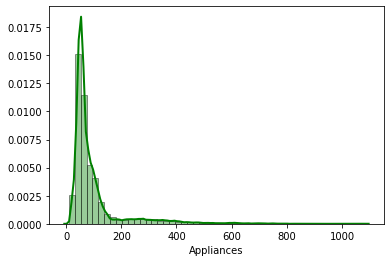

In [332]:
sb.distplot(energy_data['Appliances'], hist=True, kde=True, 
             bins= 50, color = 'green', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})

In [333]:
# Logistic Regression Model I

energy_data1 = energy_data.drop(columns=['date','lights', 'T6','RH_6','T8','RH_8','T9','RH_9','rv1', 'rv2', 'Visibility'])
energy_data1.shape
energy_data1 = energy_data1.round(3)
energy_data1.shape

(19735, 18)

In [334]:
energy_data1['Appliances'] = np.where(energy_data1['Appliances']<= 100,0,1)
print(energy_data1)

       Appliances      T1    RH_1      T2    RH_2      T3    RH_3      T4  \
0               0  19.890  47.597  19.200  44.790  19.790  44.730  19.000   
1               0  19.890  46.693  19.200  44.722  19.790  44.790  19.000   
2               0  19.890  46.300  19.200  44.627  19.790  44.933  18.927   
3               0  19.890  46.067  19.200  44.590  19.790  45.000  18.890   
4               0  19.890  46.333  19.200  44.530  19.790  45.000  18.890   
5               0  19.890  46.027  19.200  44.500  19.790  44.933  18.890   
6               0  19.890  45.767  19.200  44.500  19.790  44.900  18.890   
7               0  19.857  45.560  19.200  44.500  19.730  44.900  18.890   
8               0  19.790  45.598  19.200  44.433  19.730  44.790  18.890   
9               0  19.857  46.090  19.230  44.400  19.790  44.863  18.890   
10              1  19.927  45.863  19.357  44.400  19.790  44.900  18.890   
11              1  20.067  46.397  19.427  44.400  19.790  44.827  19.000   

In [335]:
new_energy = energy_data1.filter(['Appliances'], axis=1)
new_energy.describe()

,Appliances
count,19735.000000
mean,0.214492
std,0.410480
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [336]:
type(energy_data1)

pandas.core.frame.DataFrame

In [337]:
energy_data1.iloc[:,0:18]

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T7,RH_7,T_out,Press_mm_hg,RH_out,Windspeed,Tdewpoint
0,0,19.890,47.597,19.200,44.790,19.790,44.730,19.000,45.567,17.167,55.200,17.200,41.627,6.600,733.500,92.000,7.000,5.300
1,0,19.890,46.693,19.200,44.722,19.790,44.790,19.000,45.992,17.167,55.200,17.200,41.560,6.483,733.600,92.000,6.667,5.200
2,0,19.890,46.300,19.200,44.627,19.790,44.933,18.927,45.890,17.167,55.090,17.200,41.433,6.367,733.700,92.000,6.333,5.100
3,0,19.890,46.067,19.200,44.590,19.790,45.000,18.890,45.723,17.167,55.090,17.133,41.290,6.250,733.800,92.000,6.000,5.000
4,0,19.890,46.333,19.200,44.530,19.790,45.000,18.890,45.530,17.200,55.090,17.200,41.230,6.133,733.900,92.000,5.667,4.900
5,0,19.890,46.027,19.200,44.500,19.790,44.933,18.890,45.730,17.133,55.030,17.133,41.260,6.017,734.000,92.000,5.333,4.800
6,0,19.890,45.767,19.200,44.500,19.790,44.900,18.890,45.790,17.100,54.967,17.133,41.200,5.900,734.100,92.000,5.000,4.700
7,0,19.857,45.560,19.200,44.500,19.730,44.900,18.890,45.863,17.100,54.900,17.100,41.200,5.917,734.167,91.833,5.167,4.683
8,0,19.790,45.598,19.200,44.433,19.730,44.790,18.890,45.790,17.167,55.000,17.167,41.400,5.933,734.233,91.667,5.333,4.667
9,0,19.857,46.090,19.230,44.400,19.790,44.863,18.890,46.097,17.100,55.000,17.200,41.500,5.950,734.300,91.500,5.500,4.650


In [338]:
energy_data1_y = energy_data1.iloc[:,0]
energy_data1_x = preprocessing.scale(energy_data1.iloc[:,1:18])
energy_data1_x.shape

(19735, 17)

In [339]:
y = energy_data1_y.values
y = np.transpose(np.array([(y)]))
x = energy_data1_x

In [340]:
# create training and testing vars

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30)
print (x_train.shape, y_train.shape)
print (x_test.shape, y_test.shape)


(13814, 17) (13814, 1)
(5921, 17) (5921, 1)


In [341]:
x_train = np.c_[np.ones((len(x_train),1)),x_train]
x_test = np.c_[np.ones((len(x_test),1)),x_test]


In [342]:
print(x_train.shape,x_test.shape)

(13814, 18) (5921, 18)


In [343]:
# Cost function for Logistic Regression

def log_cost_fn(theta,x,y):
    m = len(y)
    prediction = 1/(1+np.exp(-(np.dot(x,theta))))
    cost = -(1/m) *(np.sum(y.T.dot(np.log(prediction)) + (1-y).T.dot(np.log(1-prediction))))
    return cost


In [344]:
# Gradient Descent Algorithm for logistic regression
def log_GradientDescent(x,y,theta,lrng_rate,itrs):
    m=len(y)
    cost_log = np.zeros(itrs)
    theta_log = np.zeros((itrs,(x.shape)[1]))
    
    for i in range(itrs):
        prediction = 1/(1+np.exp(-(np.dot(x,theta))))
        theta = theta-(1/m)*lrng_rate*(x.T.dot(prediction-y))
        theta_log[i,:] = theta.T[:,0]
        cost_log[i] = log_cost_fn(theta,x,y)
    return theta,cost_log,theta_log

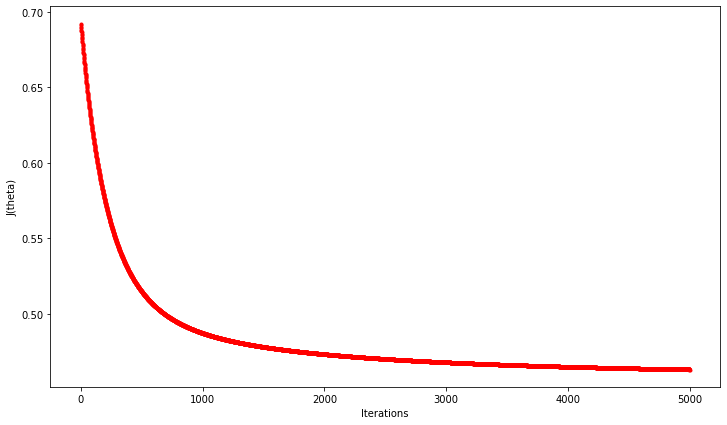

In [529]:
lrng_rate = 0.01
itrs = 5000

theta = np.zeros(((x_train.shape)[1],1))
theta,cost_log,theta_log = log_GradientDescent(x_train,y_train,theta,lrng_rate,itrs)

fig,ax = plt.subplots(figsize=(12,7))

ax.set_ylabel('J(theta)')
ax.set_xlabel('Iterations')
_=ax.plot(range(itrs),cost_log,'r.')

In [531]:
threshold = 0.000001
def converge(x, y, theta, lrng_rate, threshold, itrs):
  converged = False
  j = 0
  m=len(y)  
  cost_present = log_cost_fn(theta,x,y)
  while (converged == False):
        prediction = 1/(1+np.exp(-(np.dot(x,theta))))
        theta = theta-(1/m)*lrng_rate*(x.T.dot(prediction-y))
        cost_new = log_cost_fn(theta,x_test,y_test)
        
        if(abs(cost_new - cost_present)  <= threshold or j == itrs) :
              coverged = True
              break
        j+=1
        cost_present = cost_new
  return j,cost_new,theta

theta = np.zeros(((x_train.shape)[1],1))
iterations,cost,theta_optimal = converge(x_train, y_train, theta, lrng_rate, threshold, itrs)
print(iterations)
print(cost)

5000
0.4588399343441783


In [532]:
print(theta_optimal.T)

[[-1.42198504  0.15777821  0.81403174  0.17347297 -0.17689684  0.34276865
   0.12735036 -0.19602891 -0.01472006 -0.23803427  0.14317467 -0.18841705
  -0.74294023  0.02613281 -0.08095854 -0.29587708  0.05315861 -0.08901399]]


In [540]:
predicted_value = 1/(1+np.exp(-(np.dot(x_test,theta_optimal))))
y_pred = np.where(predicted_value<= 0.50,0,1)

In [541]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[4599,   75],
       [1111,  136]], dtype=int64)

In [420]:
(4643+24)/len(x_test)

0.7882114507684512

In [542]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.98      0.89      4674
           1       0.64      0.11      0.19      1247

    accuracy                           0.80      5921
   macro avg       0.72      0.55      0.54      5921
weighted avg       0.77      0.80      0.74      5921



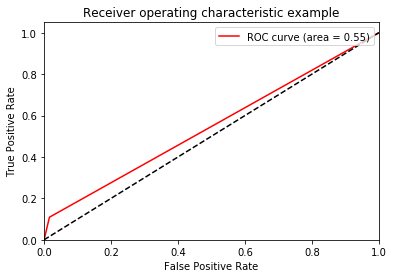

In [601]:
from sklearn.metrics import roc_curve, auc

from sklearn.metrics import roc_auc_score
from sklearn import metrics

auc = roc_auc_score(y_test,y_pred)
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred)

plt.plot(fpr, tpr, color='red', label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="upper right")
plt.show()

In [543]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)
predictions = logmodel.predict(x_test)

print(classification_report(y_test,predictions))

confusion_matrix = confusion_matrix(y_test, predictions)
print(confusion_matrix)

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      4674
           1       0.68      0.21      0.32      1247

    accuracy                           0.81      5921
   macro avg       0.75      0.59      0.60      5921
weighted avg       0.79      0.81      0.77      5921

[[4552  122]
 [ 989  258]]


C:\Users\s_s11\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\s_s11\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [544]:
# Logistics Regression Model II
# Picking ten features randomly and retraining the models only on these ten features
energy_data_random = energy_data.drop(columns=['date','lights', 'RH_1','RH_2','RH_3','RH_4','RH_5','T6','RH_6','RH_7','RH_8','T9','RH_9','RH_out','Windspeed','rv1', 'rv2', 'Visibility'])
energy_data_random = energy_data_random.round(3)
energy_data_random['Appliances'] = np.where(energy_data_random['Appliances']<= 100,0,1)

In [545]:
energy_data_random.shape

(19735, 11)

In [353]:
energy_data_random.iloc[:,0:11]

,Appliances,T1,T2,T3,T4,T5,T7,T8,T_out,Press_mm_hg,Tdewpoint
0,0,19.890,19.200,19.790,19.000,17.167,17.200,18.200,6.600,733.500,5.300
1,0,19.890,19.200,19.790,19.000,17.167,17.200,18.200,6.483,733.600,5.200
2,0,19.890,19.200,19.790,18.927,17.167,17.200,18.200,6.367,733.700,5.100
3,0,19.890,19.200,19.790,18.890,17.167,17.133,18.100,6.250,733.800,5.000
4,0,19.890,19.200,19.790,18.890,17.200,17.200,18.100,6.133,733.900,4.900
5,0,19.890,19.200,19.790,18.890,17.133,17.133,18.100,6.017,734.000,4.800
6,0,19.890,19.200,19.790,18.890,17.100,17.133,18.100,5.900,734.100,4.700
7,0,19.857,19.200,19.730,18.890,17.100,17.100,18.100,5.917,734.167,4.683
8,0,19.790,19.200,19.730,18.890,17.167,17.167,18.100,5.933,734.233,4.667
9,0,19.857,19.230,19.790,18.890,17.100,17.200,18.100,5.950,734.300,4.650


In [354]:
new_energy = energy_data_random.filter(['Appliances'], axis=1)
new_energy.describe()

,Appliances
count,19735.000000
mean,0.214492
std,0.410480
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [563]:
energy_data_random_y = energy_data_random.iloc[:,0]
energy_data_random_x = preprocessing.scale(energy_data_random.iloc[:,1:11])


In [564]:
y_random = energy_data_random_y.values
y_random = np.transpose(np.array([(y_random)]))
x_random = energy_data_random_x
y_random

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [1]])

In [565]:
#Splitting into training and test dataset
#random.seed(144)

x_random_train, x_random_test, y_random_train, y_random_test = train_test_split(x_random, y_random, test_size=0.30)
print (x_random_train.shape, y_random_train.shape)
print (x_random_test.shape, y_random_test.shape)

(13814, 10) (13814, 1)
(5921, 10) (5921, 1)


In [566]:
x_random_train = np.c_[np.ones((len(x_random_train),1)),x_random_train]
x_random_test = np.c_[np.ones((len(x_random_test),1)),x_random_test]

In [567]:
print(x_random_train.shape,x_random_test.shape)

(13814, 11) (5921, 11)


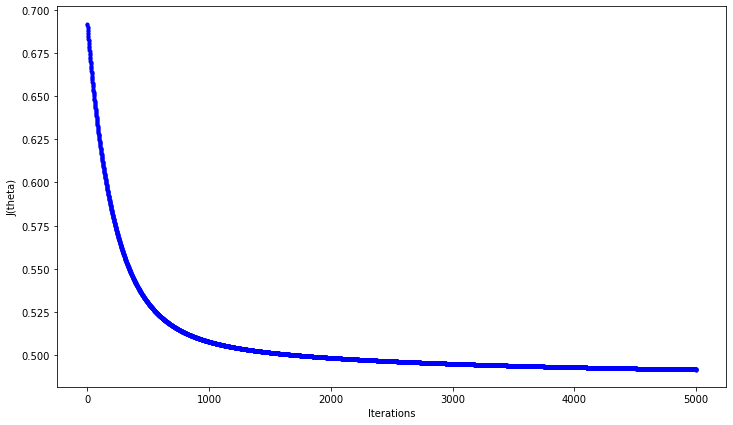

In [574]:
lrng_rate = 0.01
itrs = 5000

theta = np.zeros(((x_random_train.shape)[1],1))
theta,cost_log,theta_log = log_GradientDescent(x_random_train,y_random_train,theta,lrng_rate,itrs)

fig,ax = plt.subplots(figsize=(12,7))

ax.set_ylabel('J(theta)')
ax.set_xlabel('Iterations')
_=ax.plot(range(itrs),cost_log,'b.')

In [575]:
threshold = 0.0000001
def converge(x, y, theta, lrng_rate, threshold, itrs):
  converged = False
  j = 0
  m=len(y)  
  cost_present = log_cost_fn(theta,x,y)
  while (converged == False):
        prediction = 1/(1+np.exp(-(np.dot(x,theta))))
        theta = theta-(1/m)*lrng_rate*(x.T.dot(prediction-y))
        cost_new = log_cost_fn(theta,x_random_test,y_random_test)
        
        if(abs(cost_new - cost_present)  <= threshold or j == itrs) :
              coverged = True
              break
        j+=1
        cost_present = cost_new
  return j,cost_new,theta

theta = np.zeros(((x_random_train.shape)[1],1))
iterations,cost,thetaRandom_optimal = converge(x_random_train, y_random_train, theta, lrng_rate, threshold, itrs)
print(iterations)
print(cost)

5000
0.4936590381682629


In [571]:
print(thetaRandom_optimal.T)

[[ 0.21436059 -0.05481859  0.08391973  0.13711193 -0.04338467 -0.06473186
  -0.11519722  0.10003947  0.09848739 -0.00556223 -0.10798446]]


In [576]:
predicted_value_random = 1/(1+np.exp(-(np.dot(x_random_test,thetaRandom_optimal))))
y_pred_random = np.where(predicted_value_random <= 0.50,0,1)
y_pred_random

array([[0],
       [0],
       [0],
       ...,
       [1],
       [0],
       [0]])

In [577]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_random_test,y_pred_random)

array([[4615,   49],
       [1248,    9]], dtype=int64)

In [589]:
(4615+9)/len(x_random_test)

0.7809491639925689

In [580]:
from sklearn.metrics import classification_report
print(classification_report(y_random_test,y_pred_random))

              precision    recall  f1-score   support

           0       0.79      0.99      0.88      4664
           1       0.16      0.01      0.01      1257

    accuracy                           0.78      5921
   macro avg       0.47      0.50      0.45      5921
weighted avg       0.65      0.78      0.69      5921



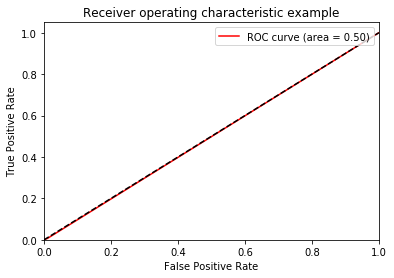

In [603]:
from sklearn.metrics import roc_curve, auc

from sklearn.metrics import roc_auc_score
from sklearn import metrics

auc = roc_auc_score(y_random_test,y_pred_random)
fpr, tpr, thresholds = metrics.roc_curve(y_random_test,y_pred_random)

plt.plot(fpr, tpr, color='red', label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="upper right")
plt.show()

In [593]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

logmodel = LogisticRegression()
logmodel.fit(x_random_train,y_random_train)
predictions = logmodel.predict(x_random_test)

print(classification_report(y_random_test,predictions))

confusion_matrix = confusion_matrix(y_random_test, predictions)
print(confusion_matrix)

              precision    recall  f1-score   support

           0       0.79      0.98      0.88      4664
           1       0.37      0.04      0.08      1257

    accuracy                           0.78      5921
   macro avg       0.58      0.51      0.48      5921
weighted avg       0.70      0.78      0.71      5921

[[4572   92]
 [1202   55]]


C:\Users\s_s11\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\s_s11\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [514]:
# Logistics Regression Model III
# Picking ten features randomly and retraining the models only on these ten features
energy_data_best = energy_data.drop(columns=['date','lights', 'RH_1','RH_2','RH_3','RH_4','RH_5','T6','RH_6','RH_7','RH_8','T9','RH_9','RH_out','Windspeed','rv1', 'rv2', 'Visibility'])
energy_data_best = energy_data_best.round(3)
energy_data_best['Appliances'] = np.where(energy_data_best['Appliances']<= 100,0,1)

In [515]:
energy_data_best.shape

(19735, 11)

In [516]:
energy_data_best.iloc[:,0:11]

,Appliances,T1,T2,T3,T4,T5,T7,T8,T_out,Press_mm_hg,Tdewpoint
0,0,19.890,19.200,19.790,19.000,17.167,17.200,18.200,6.600,733.500,5.300
1,0,19.890,19.200,19.790,19.000,17.167,17.200,18.200,6.483,733.600,5.200
2,0,19.890,19.200,19.790,18.927,17.167,17.200,18.200,6.367,733.700,5.100
3,0,19.890,19.200,19.790,18.890,17.167,17.133,18.100,6.250,733.800,5.000
4,0,19.890,19.200,19.790,18.890,17.200,17.200,18.100,6.133,733.900,4.900
5,0,19.890,19.200,19.790,18.890,17.133,17.133,18.100,6.017,734.000,4.800
6,0,19.890,19.200,19.790,18.890,17.100,17.133,18.100,5.900,734.100,4.700
7,0,19.857,19.200,19.730,18.890,17.100,17.100,18.100,5.917,734.167,4.683
8,0,19.790,19.200,19.730,18.890,17.167,17.167,18.100,5.933,734.233,4.667
9,0,19.857,19.230,19.790,18.890,17.100,17.200,18.100,5.950,734.300,4.650


In [517]:
new_energy = energy_data_best.filter(['Appliances'], axis=1)
new_energy.describe()

,Appliances
count,19735.000000
mean,0.214492
std,0.410480
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [518]:
energy_data_best_y = energy_data_random.iloc[:,0]
energy_data_best_x = preprocessing.scale(energy_data_random.iloc[:,1:11])

In [519]:
y_best = energy_data_best_y.values
y_best = np.transpose(np.array([(y_best)]))
x_best = energy_data_best_x
x_best.shape

(19735, 10)

In [520]:
#Splitting into training and test dataset

x_best_train, x_best_test, y_best_train, y_best_test = train_test_split(x_best, y_best, test_size=0.30)
print (x_best_train.shape, y_best_train.shape)
print (x_best_test.shape, y_best_test.shape)

(13814, 10) (13814, 1)
(5921, 10) (5921, 1)


In [521]:
x_best_train = np.c_[np.ones((len(x_best_train),1)),x_best_train]
x_best_test = np.c_[np.ones((len(x_best_test),1)),x_best_test]

In [522]:
print(x_best_train.shape,x_best_test.shape)

(13814, 11) (5921, 11)


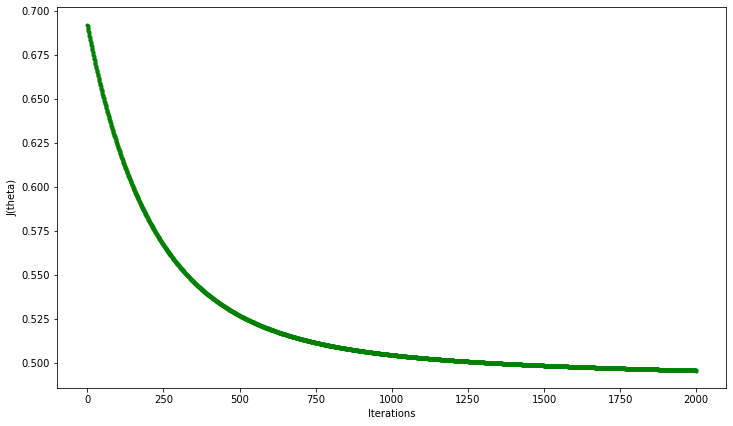

In [523]:
lrng_rate = 0.01
itrs = 2000

theta = np.zeros(((x_best_train.shape)[1],1))
theta,cost_log,theta_log = log_GradientDescent(x_best_train,y_best_train,theta,lrng_rate,itrs)

fig,ax = plt.subplots(figsize=(12,7))

ax.set_ylabel('J(theta)')
ax.set_xlabel('Iterations')
_=ax.plot(range(itrs),cost_log,'g.')

In [582]:
threshold = 0.0000001
def converge(x, y, theta, lrng_rate, threshold, itrs):
  converged = False
  j = 0
  m=len(y)  
  cost_present = log_cost_fn(theta,x,y)
  while (converged == False):
        prediction = 1/(1+np.exp(-(np.dot(x,theta))))
        theta = theta-(1/m)*lrng_rate*(x.T.dot(prediction-y))
        cost_new = log_cost_fn(theta,x_best_test,y_best_test)
        
        if(abs(cost_new - cost_present)  <= threshold or j == itrs) :
              coverged = True
              break
        j+=1
        cost_present = cost_new
  return j,cost_new,theta

theta = np.zeros(((x_best_train.shape)[1],1))
iterations,cost,theta_optimal = converge(x_best_train, y_best_train, theta, lrng_rate, threshold, itrs)
print(iterations)
print(cost)

5000
0.4988878808727544


In [583]:
predicted_value_best = 1/(1+np.exp(-(np.dot(x_best_test,theta_optimal))))
y_pred_best = np.where(predicted_value_best<= 0.50,0,1)

In [586]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_best_test,y_pred_best)

array([[4595,   28],
       [1292,    6]], dtype=int64)

In [587]:
(4595+6)/len(x_best_test)

0.7770646850194224

In [585]:
from sklearn.metrics import classification_report
print(classification_report(y_best_test,y_pred_best))

              precision    recall  f1-score   support

           0       0.78      0.99      0.87      4623
           1       0.18      0.00      0.01      1298

    accuracy                           0.78      5921
   macro avg       0.48      0.50      0.44      5921
weighted avg       0.65      0.78      0.68      5921



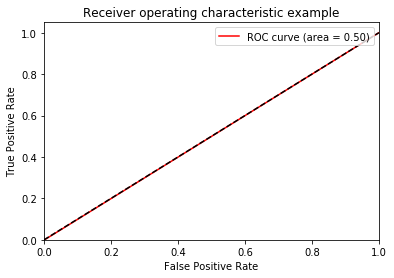

In [608]:
from sklearn.metrics import roc_curve, auc

from sklearn.metrics import roc_auc_score
from sklearn import metrics

auc = roc_auc_score(y_best_test,y_pred_best)
fpr, tpr, thresholds = metrics.roc_curve(y_best_test,y_pred_best)

plt.plot(fpr, tpr, color='red', label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="upper right")
plt.show()

In [592]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

logmodel = LogisticRegression()
logmodel.fit(x_best_train,y_best_train)
predictions = logmodel.predict(x_best_test)

print(classification_report(y_best_test,predictions))

confusion_matrix = confusion_matrix(y_best_test, predictions)
print(confusion_matrix)

              precision    recall  f1-score   support

           0       0.79      0.98      0.87      4623
           1       0.44      0.04      0.08      1298

    accuracy                           0.78      5921
   macro avg       0.61      0.51      0.48      5921
weighted avg       0.71      0.78      0.70      5921

[[4550   73]
 [1240   58]]


C:\Users\s_s11\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\s_s11\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
